In [1]:
import create_deep_network
import S_to_neural_net
import numpy as np
import random
import time
import copy
import matplotlib.pyplot as plt
import array_to_latex as a2l

# Initialize function and W

In [2]:
m=100
breakpoints=np.linspace(0,1,m+1)
y_breakpoints=np.array([random.randint(-3000,3000)/1000 for _ in range((m+1))])
breakpoints[0],breakpoints[-1]=0,1
W=15

# Draw function

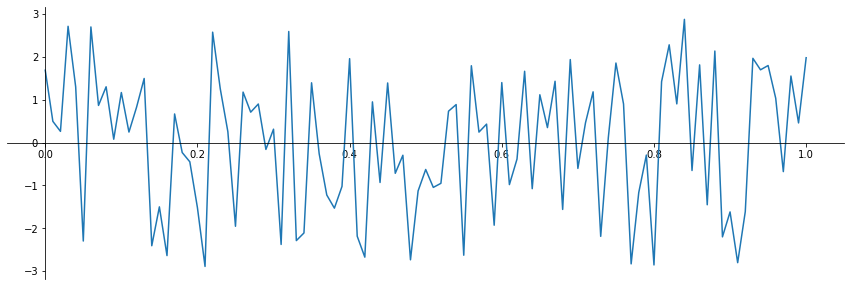

In [3]:
#plt.plot(breakpoints,y_breakpoints)

fig = plt.figure(1,figsize=(15,5)) #initialize figure
#ax = plt.gca()  # gca stands for 'get current axis'; produce 'normal' axis
ax = fig.add_subplot(1,1,1)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

#ax.plot(t,l, linestyle='dotted',color='black')#plot the two line
ax.plot(breakpoints,y_breakpoints)
fig.savefig('original graph')
plt.show() 

In [4]:
breakpoints

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [5]:
y_breakpoints

array([ 1.689,  0.496,  0.262,  2.713,  1.3  , -2.296,  2.698,  0.867,
        1.302,  0.079,  1.168,  0.246,  0.825,  1.496, -2.406, -1.499,
       -2.636,  0.668, -0.232, -0.448, -1.517, -2.889,  2.576,  1.257,
        0.254, -1.952,  1.178,  0.71 ,  0.9  , -0.159,  0.313, -2.376,
        2.592, -2.286, -2.108,  1.395, -0.26 , -1.223, -1.529, -1.022,
        1.958, -2.184, -2.672,  0.95 , -0.93 ,  1.391, -0.716, -0.295,
       -2.734, -1.128, -0.627, -1.045, -0.95 ,  0.733,  0.887, -2.627,
        1.793,  0.245,  0.431, -1.927,  1.4  , -0.98 , -0.384,  1.664,
       -1.075,  1.116,  0.35 ,  1.431, -1.559,  1.937, -0.602,  0.462,
        1.184, -2.187,  0.116,  1.856,  0.901, -2.829, -1.165, -0.291,
       -2.854,  1.422,  2.281,  0.903,  2.875, -0.651,  1.813, -1.45 ,
        2.136, -2.199, -1.617, -2.801, -1.61 ,  1.966,  1.698,  1.798,
        1.034, -0.677,  1.553,  0.459,  1.98 ])

# Draw dilated function

In [6]:
subs_points,a,b=create_deep_network.create_subfunctions(breakpoints,y_breakpoints,W)
weights_subs=S_to_neural_net.Sk_spline_interpolation(subs_points)

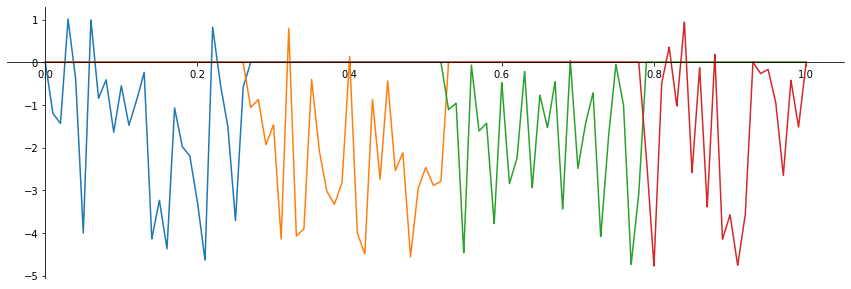

In [7]:
ts=[]
ys=[]

#

for k in range(len(subs_points)):
    t=np.linspace(0,1,10000) #points for x coordinates
    Sk_breaks,Sk_weights,a,b=weights_subs[k]
    breaks_lower,breaks_higher=subs_points[k][0][0],subs_points[k][0][-1]
    #print(breaks_lower,breaks_higher)
    
    y=[]
    for x in t:
        if x>=breaks_lower and x<=breaks_higher:
            y.append(S_to_neural_net.evaluation_cpwl_basis_splines(x,Sk_breaks,Sk_weights,a,b))
        else:
            y.append(0)
        
    
    ts.append(t)
    ys.append(y)
fig = plt.figure(1,figsize=(15,5)) #initialize figure
#ax = plt.gca()  # gca stands for 'get current axis'; produce 'normal' axis
ax = fig.add_subplot(1,1,1)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

#ax.plot(t,l, linestyle='dotted',color='black')#plot the two line
for k in range(len(ys)):               
    ax.plot(ts[k],ys[k])
fig.savefig('dilated graph')
plt.show() 

# Draw for each subfunction the functions S_k via the Theorem

In [8]:
def subgraphs(weights_Sk,breakpoints,T):

    w_m=copy.copy(weights_Sk)
    #print(w_m)
    #print(len(w_m))
    L=[3,4,5,6,7,11,13]
    Cols=2
    for k in L:
        if len(w_m)%k==0:
            Cols=k
            break

    Rows = len(w_m)//Cols

    #print(Rows,Cols,len(w_m))
    #print(Cols,Rows)    
    if Rows>1:
        fig, ax = plt.subplots(Rows,Cols,figsize=(15,15))
        #fig=plt.figure(8,figsize=(15,9))
        t=np.linspace(breakpoints[0],breakpoints[-1],10000) #points for x coordinates
        for k in range(len(w_m)):
            Sk_breaks,Sk_weights,a,b=w_m[k]
            y=np.array([S_to_neural_net.evaluation_cpwl_basis_splines(x,Sk_breaks,Sk_weights,a,b) for x in t]) #y coordinates
            #print(y)
            u = y.copy()#two copies for both lines
            l = y.copy()
            u[u < 0] =np.nan #define on which interval the line should appear (-> np.nan = no point on this place!)
            l[l >= 0] =np.nan

            Row=k//Cols
            Column=k%Cols
            #print(Row,Column)
            #ax = plt.gca()  # gca stands for 'get current axis'; produce 'normal' axis
            #ax = fig.add_subplot(Rows,Cols,k+1)
            #ax = fig.add_subplot(Rows,Cols,1)
            ax[Row,Column].spines['right'].set_color('none')
            ax[Row,Column].spines['top'].set_color('none')
            ax[Row,Column].xaxis.set_ticks_position('bottom')
            ax[Row,Column].spines['bottom'].set_position(('data',0))
            ax[Row,Column].yaxis.set_ticks_position('left')
            #ax[k].spines['left'].set_position(('data',0))

            ax[Row,Column].plot(t,l, linestyle='dotted',color='black')#plot the two lines
            ax[Row,Column].plot(t,u, linestyle='solid',color='black')

            #ax[Row,Column].title('subgraphs')
            #plt.show()
        fig.suptitle(T, fontsize=16)
        fig.savefig(T)
        plt.show()
    else:
        fig, ax = plt.subplots(Cols,figsize=(15,15))
        #fig=plt.figure(8,figsize=(15,9))
        t=np.linspace(breakpoints[0],breakpoints[-1],10000) #points for x coordinates
        for k in range(len(w_m)):
            Sk_breaks,Sk_weights,a,b=w_m[k]
            y=np.array([S_to_neural_net.evaluation_cpwl_basis_splines(x,Sk_breaks,Sk_weights,a,b) for x in t]) #y coordinates
            #print(y)
            u = y.copy()#two copies for both lines
            l = y.copy()
            u[u < 0] =np.nan #define on which interval the line should appear (-> np.nan = no point on this place!)
            l[l >= 0] =np.nan

            Row=k//Cols
            Column=k%Cols
            #print(Row,Column)
            #ax = plt.gca()  # gca stands for 'get current axis'; produce 'normal' axis
            #ax = fig.add_subplot(Rows,Cols,k+1)
            #ax = fig.add_subplot(Rows,Cols,1)
            ax[Column].spines['right'].set_color('none')
            ax[Column].spines['top'].set_color('none')
            ax[Column].xaxis.set_ticks_position('bottom')
            ax[Column].spines['bottom'].set_position(('data',0))
            ax[Column].yaxis.set_ticks_position('left')
            #ax[k].spines['left'].set_position(('data',0))

            ax[Column].plot(t,l, linestyle='dotted',color='black')#plot the two lines
            ax[Column].plot(t,u, linestyle='solid',color='black')

            #ax[Row,Column].title('subgraphs')
            #plt.show()
        fig.suptitle(T, fontsize=16)
        fig.savefig(T)
        plt.show()

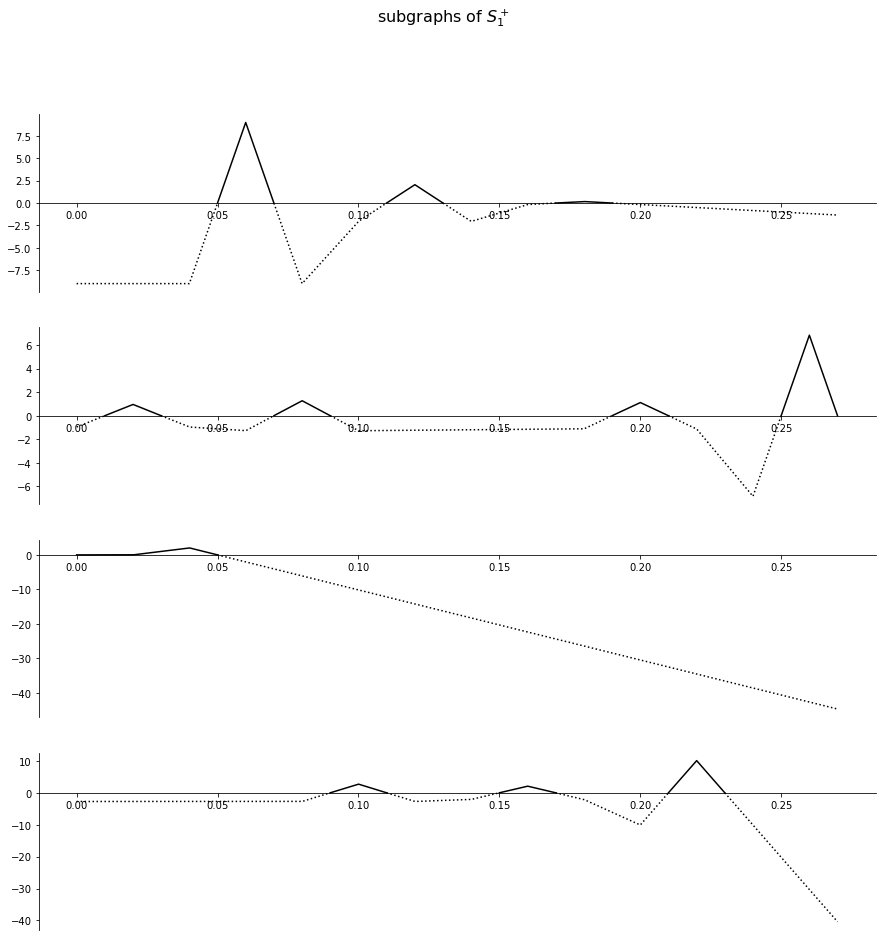

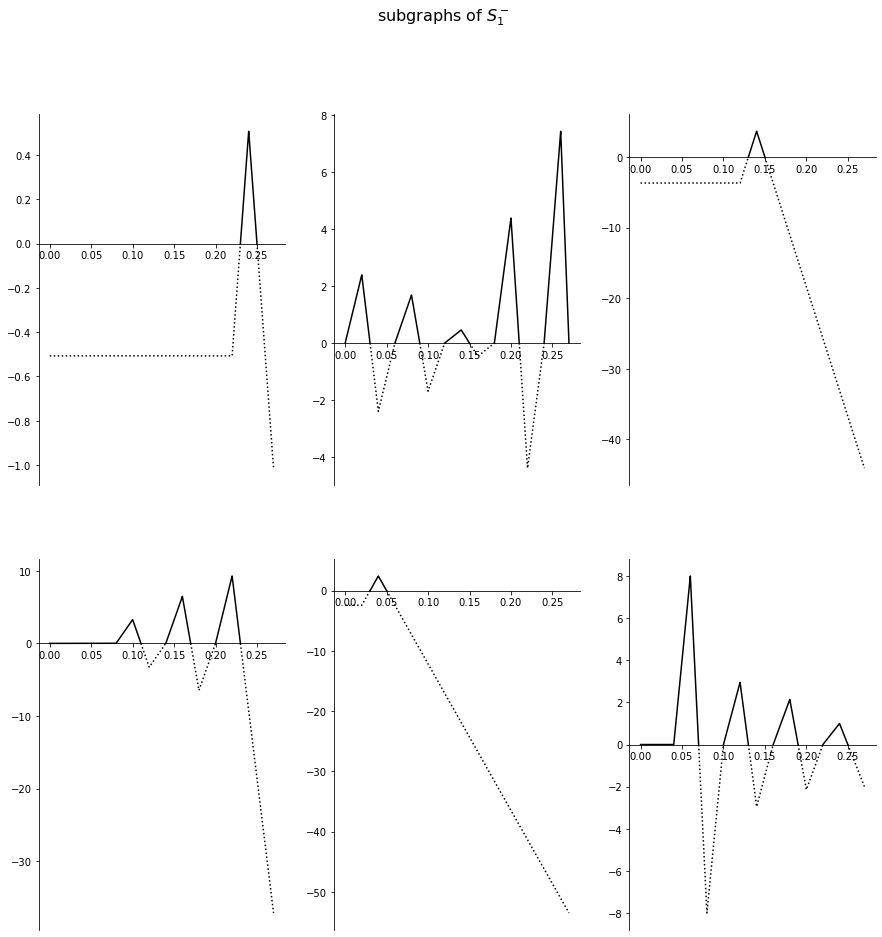

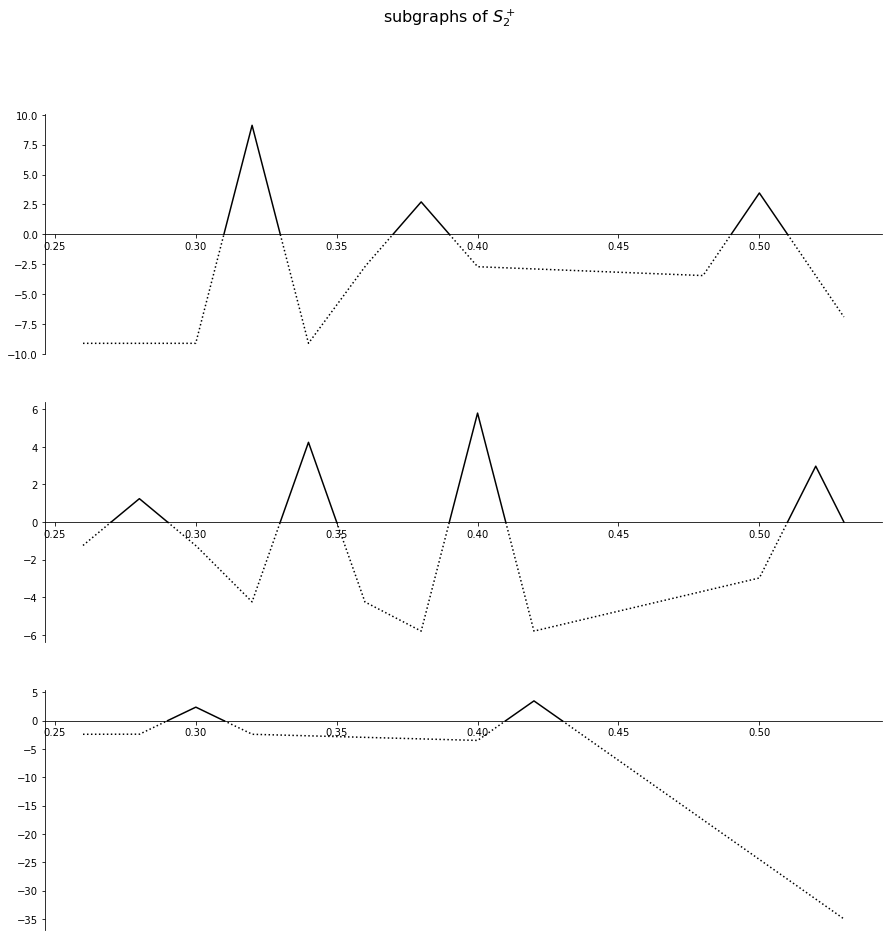

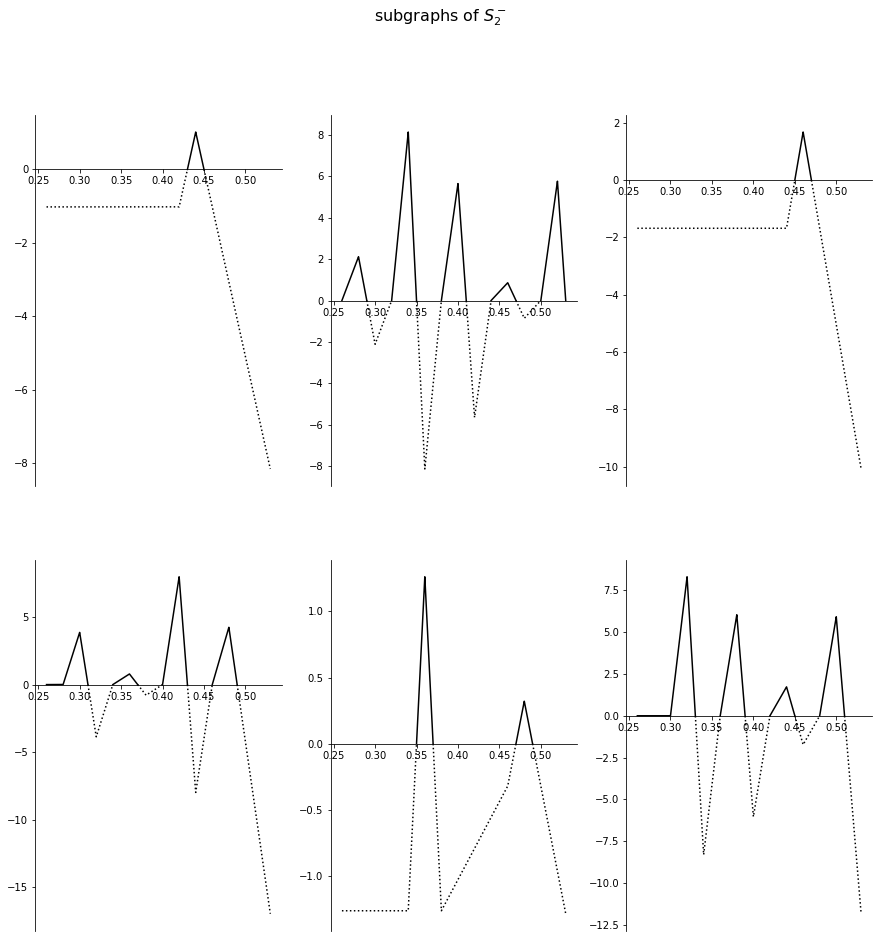

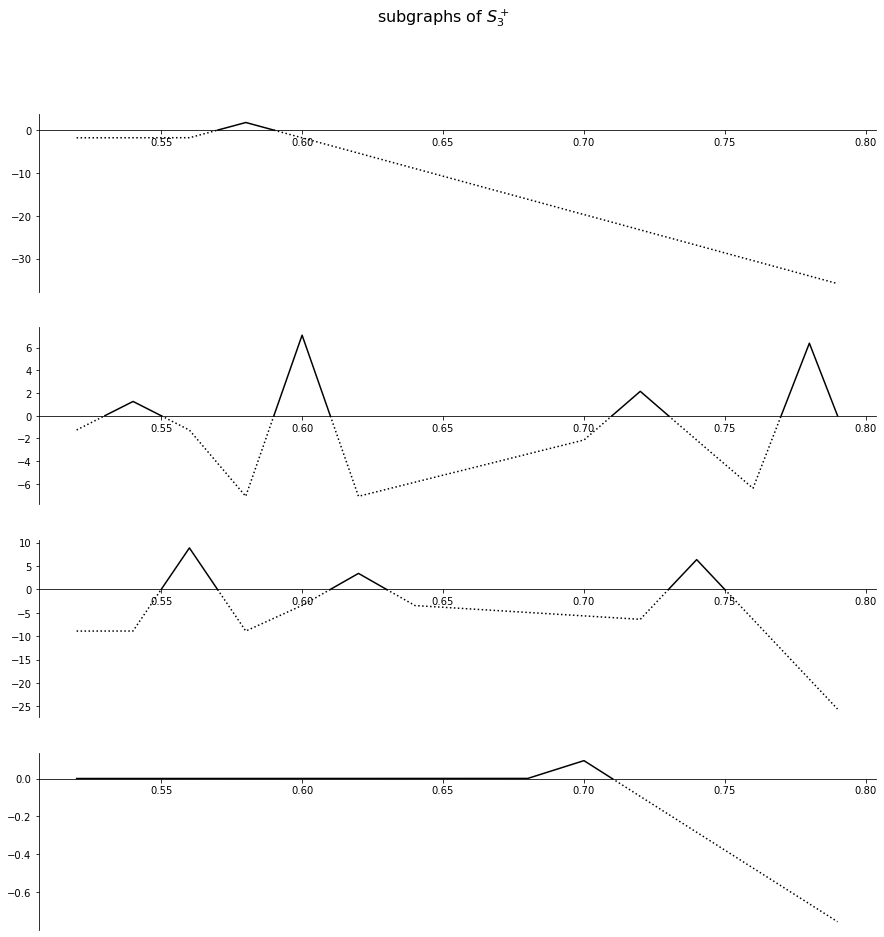

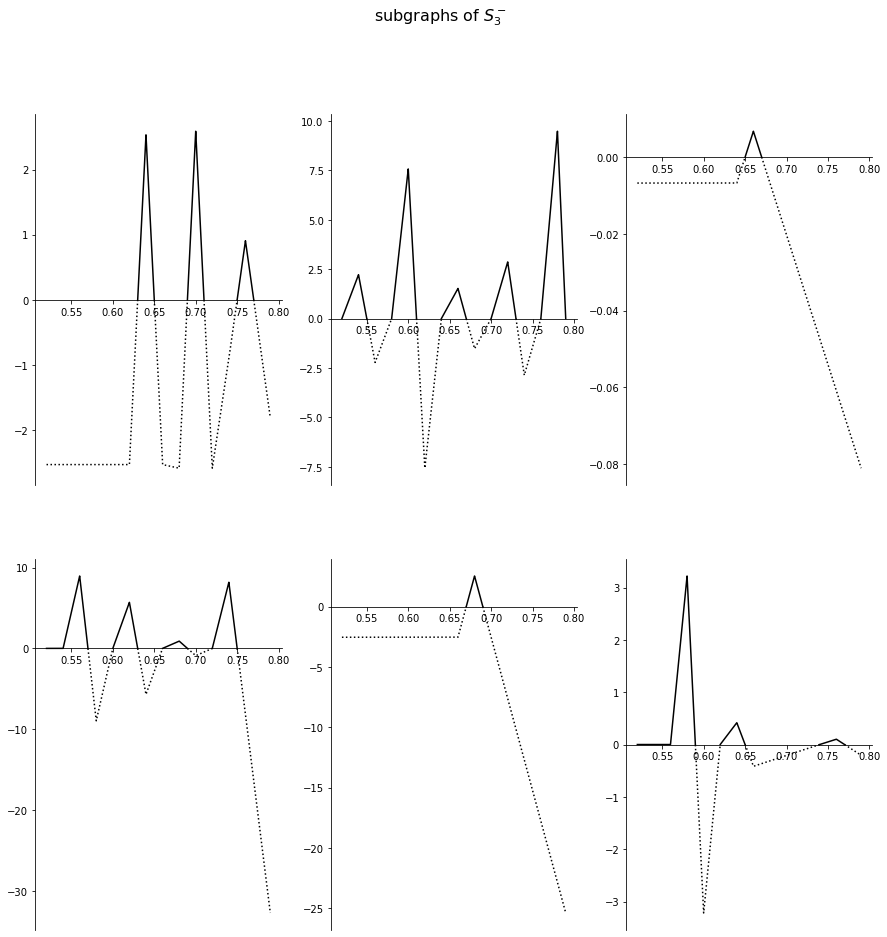

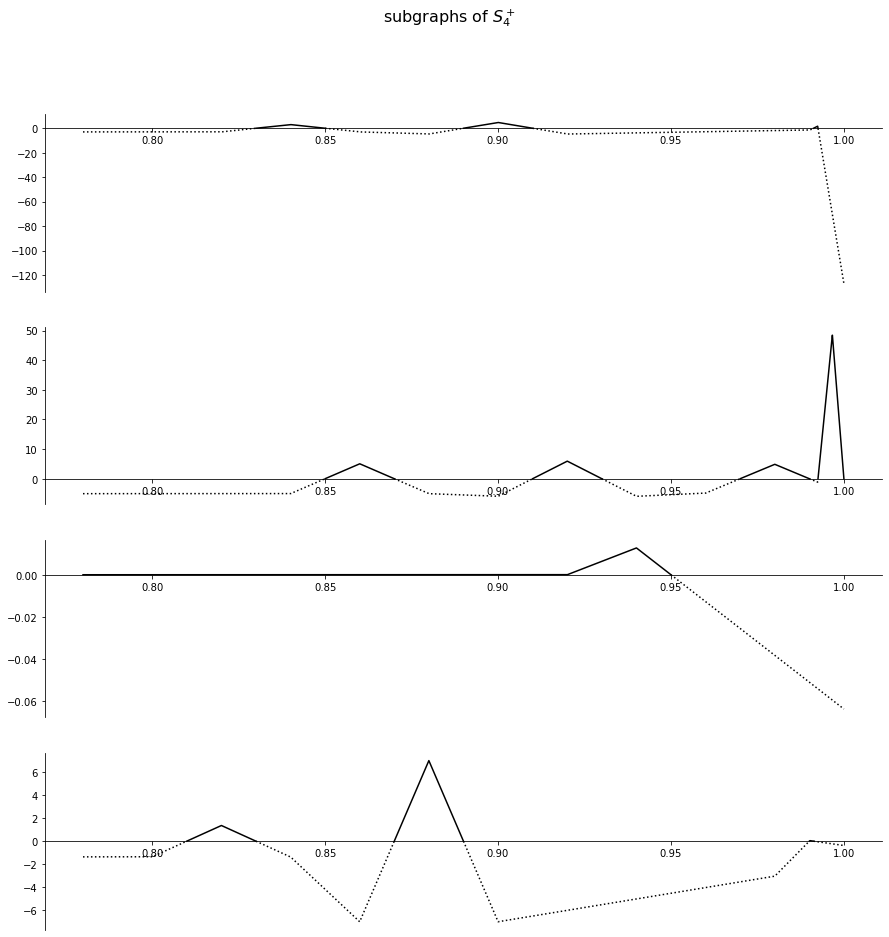

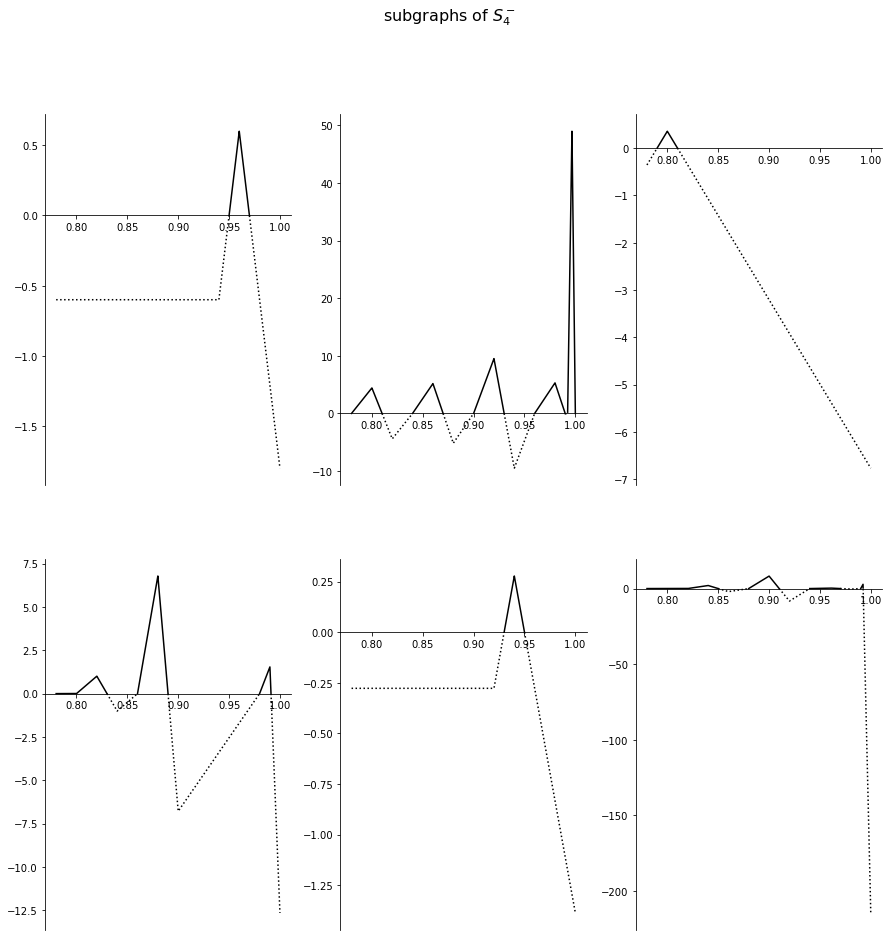

In [9]:
for k in range(len(subs_points)):
    breakpoints_=subs_points[k][0]
    y_breakpoints_=subs_points[k][1]
    weights,principal_breakpoints=S_to_neural_net.S_into_basis_phi(breakpoints_,y_breakpoints_,W) #create weights and pricipal breakpoint for basis of {phi_k}
    Lp,Lm=S_to_neural_net.Lambdas(weights,W) #create index sets Lambda
    Sk_points_interpolation_plus,Sk_points_interpolation_minus=S_to_neural_net.Sk_points_for_interpolation_plus(Lp,principal_breakpoints,breakpoints_,weights,W),S_to_neural_net.Sk_points_for_interpolation_minus(Lm,principal_breakpoints,breakpoints_,weights,W) #create for every S_k the interpoinlation points
    weights_Sk_p,weights_Sk_m=S_to_neural_net.Sk_spline_interpolation(Sk_points_interpolation_plus),S_to_neural_net.Sk_spline_interpolation(Sk_points_interpolation_minus) #create spline basis for every S_k
    subgraphs(weights_Sk_p,breakpoints_,'subgraphs of $S_{}^+$'.format(k+1))
    subgraphs(weights_Sk_m,breakpoints_,'subgraphs of $S_{}^-$'.format(k+1))
    weigths_Sk=weights_Sk_p+weights_Sk_m 

# Matrices of subplots

In [11]:
for k in range(len(subs_points)):
    matrix_0,bias_0,matrix_1,bias_1,matrix_2=S_to_neural_net.create_neural_net_from_S(W,subs_points[k][0],subs_points[k][1])
    #print(subs_points[k])
    print('\033[1m'+'{}. subgraph:'.format(k+1))
    print('\033[0m')
    print('M_0='),a2l.to_ltx(np.around(matrix_0,3),frmt = '{:6.3f}')
    print()
    print('b_0='),a2l.to_ltx(np.around(bias_0,3),frmt = '{:6.3f}')
    print()
    print('M_1='),a2l.to_ltx(np.around(matrix_1,3),frmt = '{:6.3f}')
    print()
    print('b_1='),a2l.to_ltx(np.around(bias_1,3),frmt = '{:6.3f}')
    print()
    print('M_2='),a2l.to_ltx(np.around(matrix_2,3),frmt = '{:6.3f}')
    print()
    print()

1. subgraph:

M_0=
\begin{bmatrix}
   1.000\\
   1.000\\
   1.000\\
   1.000\\
   1.000\\
   1.000\\
   1.000\\
   1.000\\
   1.000\\
   1.000\\
   1.000\\
   1.000\\
   1.000\\
   1.000\\
   0.000
\end{bmatrix}

b_0=
\begin{bmatrix}
   0.000 & -0.020 & -0.040 & -0.060 & -0.080 & -0.100 & -0.120 & -0.140 & -0.160 & -0.180 & -0.200 & -0.220 & -0.240 & -0.260 &   0.000
\end{bmatrix}

M_1=
\begin{bmatrix}
   1.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000\\
   0.000 &   0.000 &  899.064 & -1798.128 &  1246.041 & -141.867 & -410.220 &  299.287 & -77.421 & -33.512 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000\\
  95.900 & -191.800 &  80.127 &  143.219 & -254.892 &  129.372 &   0.000 &   0.000 &   0.000 &  110.112 & -224.076 & -173.985 &  970.107 & -1368.168 &   0.000\\
   0.000 &  101.527 & -304.581 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000 & 

# Matrices for deep net

In [12]:
M,b=create_deep_network.create_deep_neural_net(breakpoints,y_breakpoints,W)
for k in range(len(M)):
    print('M_{}='.format(k)),a2l.to_ltx(np.around(M[k],3),frmt = '{:6.3f}')
    print()
    print('b_{}='.format(k)),a2l.to_ltx(np.around(b[k],3),frmt = '{:6.3f}')
    print()

M_0=
\begin{bmatrix}
   1.000\\
   1.000\\
   1.000\\
   1.000\\
   1.000\\
   1.000\\
   1.000\\
   1.000\\
   1.000\\
   1.000\\
   1.000\\
   1.000\\
   1.000\\
   1.000\\
   0.000
\end{bmatrix}

b_0=
\begin{bmatrix}
   0.000 & -0.020 & -0.040 & -0.060 & -0.080 & -0.100 & -0.120 & -0.140 & -0.160 & -0.180 & -0.200 & -0.220 & -0.240 & -0.260 &   0.000
\end{bmatrix}

M_1=
\begin{bmatrix}
   1.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000\\
   0.000 &   0.000 &  899.064 & -1798.128 &  1246.041 & -141.867 & -410.220 &  299.287 & -77.421 & -33.512 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000\\
  95.900 & -191.800 &  80.127 &  143.219 & -254.892 &  129.372 &   0.000 &   0.000 &   0.000 &  110.112 & -224.076 & -173.985 &  970.107 & -1368.168 &   0.000\\
   0.000 &  101.527 & -304.581 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.